# Введение в искусственные нейронные сети
# Урок 6. Сегментация

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

with zipfile.ZipFile('/content/drive/MyDrive/birds.zip', 'r') as zip_ref:
    zip_ref.extractall()

## Содержание методического пособия:


<ol>
<li>Что такое сегментация изображения</li>
<li>Виды архитектур для сегментации изображений</li>
<li>Практический пример сегментации</li>
</ol>

## Что такое сегментация изображения

В компьютерное зрении есть несколько основых видов задач. Это такие задачи как классификация, сегментация и детектирование объектов.

До сих пор задачи в области комп. зрения с которыми мы сталкивались относились к задаче классификации. Эта задача подразумевает получения предсказания от нейронной сети названия класса объекта, который ей представлен на изображении.

Решение данной задачи интересно для академических кругов, для поиска новых архитектур и определенного практического применения, однако для продвинутого комп. зрения как правило требуется не только знать, что за объект находиться на изображении, но и где он находиться, какой этот объект формы и т.д. Данные задачи и призваны решить нейронные сети для сегментации и нейронные сети для дектирования объектов.


В этом уроке мы познакомимся с задачей сегментации. Сегментация изображения подразумевает отнесение каждого пикселя изображения к определенному классу. Т.е. по сути мы получаем маску изображения.

![1.png](attachment:1.png)

Источник изображения: Image Segmentation Using Deep Learning: A Survey. Shervin Minaee и др. 15 Jan 2020

Нейронные сети для сегментирования изображений находят широкое применение в беспилотном транспорте, "умном" видеонаблюдении, медицине и др. областях.


Подобного рода нейронные сети состоят как правило из части, которая ответственна за восприятие объектов на изображении и части, которая ответственна за определение контуров изображения. Данные нейросети относительно тяжеловестны с точки зрения вычеслительных затрат, однако в научных кругах ведется поиск более легковесных решений.



Для тренировки нейронных сетей решающих задачу сегментирования применяются свои специальные датасеты, в которых размечена маска изображения, например, такие как PASCAL Visual Object Classes или COCO(Common Objects in Context). Датасетов для сегментации меньше и они сложнее в составлении. Поэтому существует распространенная практика использования предобученнной нейронной сети, например, на ImageNet, в качестве части отвественной за восприятие объектов. Затем уже нейронная сеть доубучаестся на размеченных масках с помощью специальных датасетов.

На сегодняшний день существует огромное множество архитектр для сегментации изобржаней, в данном мет. пособие мы разберем основные.

## Виды архитектур для сегментации изображений


Как ранее уже было упомянуто архитектур для решения задачи сегментации существует много и продолжают появляться новые. Мы рассмотрим такие архитектуры как FCN (fully convolutional network), SegNet, U-net, Mask-RCNN. Данные архитектуры отражают основные вехи в эволюции архитектур нейронных сетей для решения задачи сегментации. Также мы рассмотрим архитектуру Autoencoder, которую полезно рассмотреть как вводную часть к большинтсву архитектур в области сегментации изображениий.

![2.png](attachment:2.png)

Источник изображения: Image Segmentation Using Deep Learning: A Survey. Shervin Minaee и др. 15 Jan 2020

### FCN (fully convolutional network)

Данная архитектура появилась в 2014 г., буквально через несколько лет после того, как глубокое обучение получило широкое распространение.

FCN в отличие от обычной CNN не имеет на конце полносвязных слоев, вместо этого на конце нейронной сети располагается модуль, который позволяет увеличить то представление изображения, которое имеют обычные CNN перед передачей данных в полносвязные слои.

![3.png](attachment:3.png)

Источник изображения: Image Segmentation Using Deep Learning: A Survey. Shervin Minaee и др. 15 Jan 2020

Данный подход позволил превзойти предыдущие подходы в этой области, которые базировались не на глубоком обучении, однако и он имел свои изъяны.

### Autoencoder



Прежде чем, мы разберерм архитектуру SegNet, давайте посмотрим на Autoencoder. Данная архитектура предствляет из себя набор слоев, которые сжимают входящие данные во все более маленькое представление, а также слоев, которые разжимают затем данные.

Если после такой процедуры сжатия и разжатия, удается получить на выходе изначальные данные, значит в центральных слоях данной архитектуры располагается сжатое представление данных. Отбросив вторую, разжимающую данные, часть, можно использовать сжатые данные для различных целей.

![0.png](attachment:0.png)

Источник изображения: https://pythonmachinelearning.pro/all-about-autoencoders/

### SegNet

SegNet появилась в 2015 г. Данная архитектура состоит из конволюционной и деконволюционной части. Она отчасти повторяет собой архитектуру Autoencoder, где есть кодирующая и декодирующая часть.

Декодирующая часть в SegNet позволяет сделать более плавное разворачивание изображения после того как отработала конвулюционная(сверточная) часть архитектуры. Благодаря этому границы объектов на изображение определяются более корректно.

Стоит отметить, что в качестве конвулюционной(сверточной) части могут использоваться различные предтренерованные нейронные сети для решения задач классификации, например различные модификации VGG и ResNet.

![4.png](attachment:4.png)

Источник изображения: Image Segmentation Using Deep Learning: A Survey. Shervin Minaee и др. 15 Jan 2020

### U-Net

U-net появился в 2015 г. для решения медицинский задач. Данная архитектура и ее модификации являются одним из основых практических инструментов для решения современных задач сегментации изображений. Данная архитектура отличается более высокой степенью точности сегментирования, достачной для работы с мед. снимками, картами где располагаются множество мелких объектов и др. задач.


U-net также как и SegNet берет input и реконструирует output как сегментированную карту изображения. Однако в данной архитектуре используются skip connection, похожие на те, что помогли решить проблему исчезающего градиента в задача классификации(ResNet архитектура). Данные skip connections позволяют сигналу не только проходить строго, сначала по нисходящей лестницы слоев, а потом по восходящей лестнице апсемплинга(увеличение маленькой репрезентации изображения в полноценную карту), но и также перескакивать между слоями одного уровня, что в частности решает проблему дублирования функций слоев и улучшает эффективность обучения.

![5.png](attachment:5.png)

Источник изображения: Image Segmentation Using Deep Learning: A Survey. Shervin Minaee и др. 15 Jan 2020

### FPN (The Feature Pyramid Network)

Данная архитектура появилась в 2017 г. Визуально, данная архитектура похожа на пирамиду. Она может применяться как для задач детектирования объектов, так и для задач сегментации изображений. FPN во многом похожа на U-Net, однако есть одно важное нововведение - предсказания снимаются не только с самой высокой части апсемплинга, но и на каждой ступени начинающейся в фазе декодирования. Это позволяет совершать детекцию на разных масштабах восстанавливаемого изображения, что положительно сказываеться на точности сегментирования.

![6.png](attachment:6.png)

Источник изображения: Feature Pyramid Networks for Object Detection, Tsung-Yi Lin и др. 19 апр. 2017 г.

### Mask R-CNN

Данная архитектура появилась в 2018 г. и является надстройкой над Faster R-CNN, одной из лучших архитектур в сфере object detection. Мы не будем касаться сейчас этой архитектуры, она будет рассмотрена в следующем уроке.

В Mask R-CNN, также как и в ранее рассмотренных архитектурах, используется часть с энкодером (например ResNet101), но в нее добавлен модуль Region Proposal Network (RPN) из сферы object detection, который позволяет эффективно находить места на изображение где могут находиться объекты, после чего Mask R-CNN генерирует сегментационную маску.

![7.png](attachment:7.png)

Источник изображения: Mask R-CNN, Kaiming He и др. 24 янв. 2018 г.

## Практический пример сегментации

В качестве практики попробуем сегментирвать изображение домашних животных из датасета Oxford-IIIT Pet Dataset, с использованием модифицированной версии U-Net. Данный пример тестировался и корректно работал при составлении мет. пособия на python 3.7.7 и tensorflow 2.1.0. Также может понадобиться установить модуль для python под названием tensorflow-datasets.

In [ ]:
##### Copyright 2019 The TensorFlow Authors.

#Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
!pip install git+https://github.com/tensorflow/examples.git

  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-1lwbnt23
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/examples.git /tmp/pip-req-build-1lwbnt23
  Resolved https://github.com/tensorflow/examples.git to commit fff4bcda7201645a1efaea4534403daf5fc03d42
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-examples: filename=tensorflow_examples-0.1703207612.1461250479831370929614362828255168868146460245314-py3-none-any.whl size=301584 sha256=5d159fc06ed7d4ec592a353d7d82f2b2c02f73418d5011384e5f3293c5acbb74
  Stored in directory: /tmp/pip-ephem-wheel-cache-k85okw7g/wheels/72/5f/d0/7fe769eaa229bf20101d11a357eb23c83c481bee2d7f710599
Successfully built tensorflow-examples


In [ ]:
try:
  %tensorflow_version only exists in Colab.
  #%tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import tensorflow.compat.v2 as tf

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow_examples.models.pix2pix import pix2pix

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

from IPython.display import clear_output
import matplotlib.pyplot as plt


import tensorflow as tf
tf.config.experimental.set_visible_devices([], 'GPU')

## Загрузка датасета Oxford-IIIT Pets

Датасет является стандартным датасетом для TensorFlow, однако как упомяналось выше возможно необходимо будет установить модуль tensorflow-datasets для python.

In [ ]:
ds_names = ( 'caltech_birds2010',)
dataset_all, info = tfds.load(ds_names[0], split = ['train[:10%]','test[-10%:]'], with_info=True)

In [ ]:
info

tfds.core.DatasetInfo(
    name='caltech_birds2010',
    full_name='caltech_birds2010/0.1.1',
    description="""
    Caltech-UCSD Birds 200 (CUB-200) is an image dataset with photos 
    of 200 bird species (mostly North American). The total number of 
    categories of birds is 200 and there are 6033 images in the 2010 
    dataset and 11,788 images in the 2011 dataset.
    Annotations include bounding boxes, segmentation labels.
    """,
    homepage='http://www.vision.caltech.edu/visipedia/CUB-200.html',
    data_dir='/root/tensorflow_datasets/caltech_birds2010/0.1.1',
    file_format=tfrecord,
    download_size=659.14 MiB,
    dataset_size=659.64 MiB,
    features=FeaturesDict({
        'bbox': BBoxFeature(shape=(4,), dtype=float32),
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=200),
        'label_name': Text(shape=(), dtype=string),
        'segme

Следующий код выполнит простую аугументацию данных посредством переворота изображений. В дополнение изображение будет нормализовано к 0 и 1. Пиксели сегментационной маски будут помечены {1, 2, 3}, но для удобства из данного цифрового ряда будет вычтено по 1 и в итоге получиться {0, 1, 2}

In [ ]:
def normalize(input_image, input_mask):
  input_image = tf.cast(input_image, tf.float32) / 255.0
  input_mask -= 1
  return input_image, input_mask

In [ ]:
@tf.function
def load_image_train(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    input_mask = tf.image.flip_left_right(input_mask)

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

In [ ]:
@tf.function
def load_image_test(datapoint):
  input_image = tf.image.resize(datapoint['image'], (128, 128))
  input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

  input_image, input_mask = normalize(input_image, input_mask)

  return input_image, input_mask

Датасет уже содержит необходимые тестовый и тренировочный сплиты, поэтому давайте использовать их.

In [ ]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 16
BUFFER_SIZE = 128
STEPS_PER_EPOCH = TRAIN_LENGTH // 10 // BATCH_SIZE

In [ ]:
train = dataset_all[0].map(load_image_train, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test = dataset_all[1].map(load_image_test)

In [ ]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

Давайте посмотрим на пример  изображения из датасета и соотвествующую ему маску из датасета.

In [ ]:
def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'True Mask', 'Predicted Mask']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
    plt.axis('off')
  plt.show()

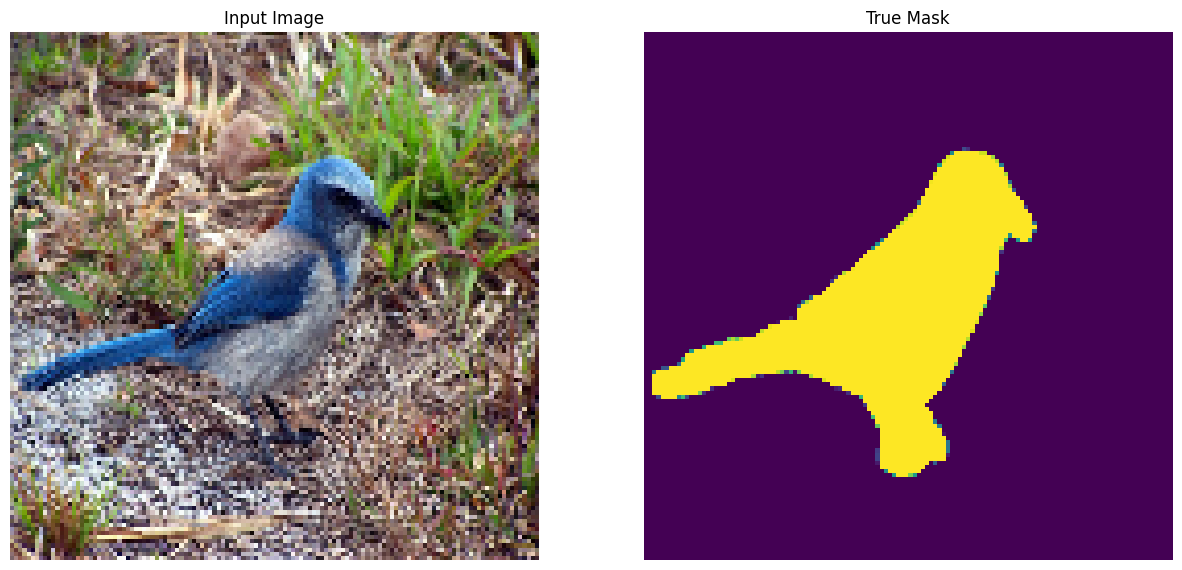

In [ ]:
for image, mask in test_dataset.take(1):
  sample_image, sample_mask = image, mask
display([sample_image[1,:,:,:], sample_mask[1,:,:,:]])

In [ ]:
sample_mask.numpy().min(),sample_mask.numpy().max()

(-1.0, 0.0)

In [ ]:
sample_mask.dtype

tf.float32

## Определение модели

Будем использовать модифицированный U-Net. В качестве энкодера будет использоваться предтренированный MobileNetV2.
Декодером будет апсемпл блок уже имплементированный в TensorFlow examples [Pix2pix tutorial](https://github.com/tensorflow/examples/blob/master/tensorflow_examples/models/pix2pix/pix2pix.py).

Причина по который будет испольваться три канала заключается в том что у нас 3 возможных лейбла на каждый пиксель. Можно это воспринимать как классиификацию где кажедый пиксель будет принадлежать одному из трех классов.

In [ ]:
OUTPUT_CHANNELS = 3

Как упоминалось ранее энкодером будет предтренированный MobileNetV2, который подготовлен и готов к использованию - [tf.keras.applications](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/applications). Энкодер состоит из определенных аутпутов из средних слоев модели. Обратите внимание энкодр не будет участвовать в процессе тренировкие модели.

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)

# Use the activations of these layers
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# Create the feature extraction model
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

9406464/9406464 [==============================] - 0s 0us/step




Декодер/апсемплер это просто серия апсемпл блоков имплементированнхы в TensorFlow examples.

In [ ]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels):
  inputs = tf.keras.layers.Input(shape=[128, 128, 3])
  x = inputs

  # Downsampling through the model
  skips = down_stack(x)
  x = skips[-1]
  skips = reversed(skips[:-1])

  # Upsampling and establishing the skip connections
  for up, skip in zip(up_stack, skips):
    x = up(x)
    concat = tf.keras.layers.Concatenate()
    x = concat([x, skip])

  # This is the last layer of the model
  last = tf.keras.layers.Conv2DTranspose(
      output_channels, 3, strides=2,
      padding='same')  #64x64 -> 128x128

  x = last(x)

  return tf.keras.Model(inputs=inputs, outputs=x)

## Тренировка модели
Now, all that is left to do is to compile and train the model. The loss being used here is `losses.SparseCategoricalCrossentropy(from_logits=True)`. The reason to use this loss function is because the network is trying to assign each pixel a label, just like multi-class prediction. In the true segmentation mask, each pixel has either a {0,1,2}. The network here is outputting three channels. Essentially, each channel is trying to learn to predict a class, and `losses.SparseCategoricalCrossentropy(from_logits=True)` is the recommended loss for
such a scenario. Using the output of the network, the label assigned to the pixel is the channel with the highest value. This is what the create_mask function is doing.

Теперь, все что осталось это скомпилировать модель и начать процесс ее тренировки. Loss-функция, которую будем использовать - `losses.SparseCategoricalCrossentropy(from_logits=True)`. Причина использования данной loss-функции заключается в том, что нейросеть пытается назначить каждому пикселю лейбл, также как в задачах предсказания класса. Для модели в которой 3 каннала каждый из которых пытается предсказать класс `losses.SparseCategoricalCrossentropy(from_logits=True)` обычно также рекомендуется.
На выходе нейросети каждому пикселю назначается лейбл с наибольшим значением. Это то, что делает функция create_mask.


In [ ]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

Посмотрим на получившуюся архитектуру модели.

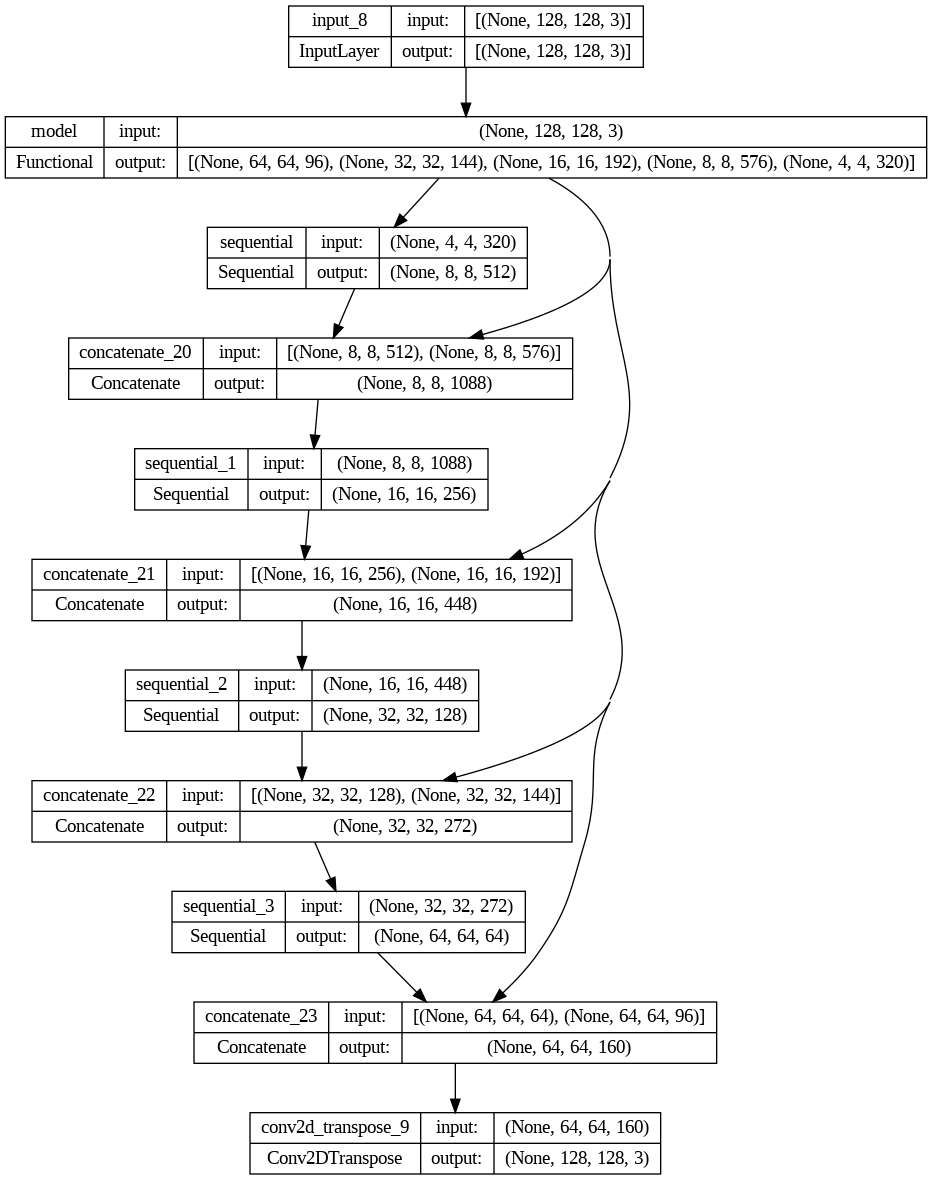

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)


Давайте попробуем сделать предсказание с помощью нашей модели до того как началось обучение.

In [ ]:
def create_mask(pred_mask):
  pred_mask = tf.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[..., tf.newaxis]
  return pred_mask[0]

In [ ]:
def show_predictions(dataset=None, num=1):
  if dataset:
    for image, mask in dataset.take(num):
      print(1)
      pred_mask = model.predict(image)
      display([image[0], mask[0], create_mask(pred_mask)])
  else:
    display([sample_image[0,:,:,:], sample_mask[0,:,:,:],
             create_mask(model.predict(sample_image[:,:,:]))])

1/1 [==============================] - 1s 1s/step


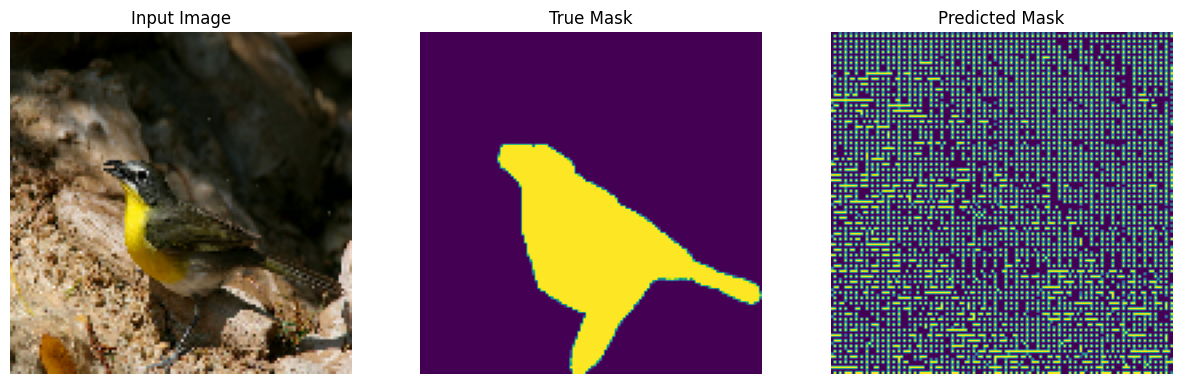

In [ ]:
show_predictions()



Давайте осуществлять мониторинг того как улучшается работа модели в процессе обучения. Для завершения этой задачи callback функция определена ниже.

In [ ]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

1/1 [==============================] - 0s 376ms/step


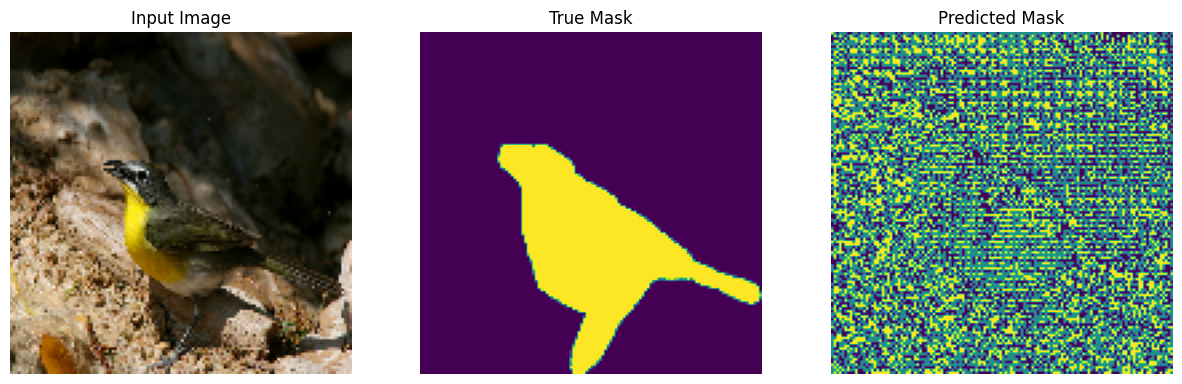


Sample Prediction after epoch 5

18/18 [==============================] - 20s 1s/step - loss: 0.0776 - accuracy: 0.0576 - val_loss: 0.3035 - val_accuracy: 0.0494


In [ ]:
EPOCHS = 5 # увеличьте при необходимости
VAL_SUBSPLITS = 5
VALIDATION_STEPS = info.splits['test'].num_examples//10//BATCH_SIZE//VAL_SUBSPLITS

model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

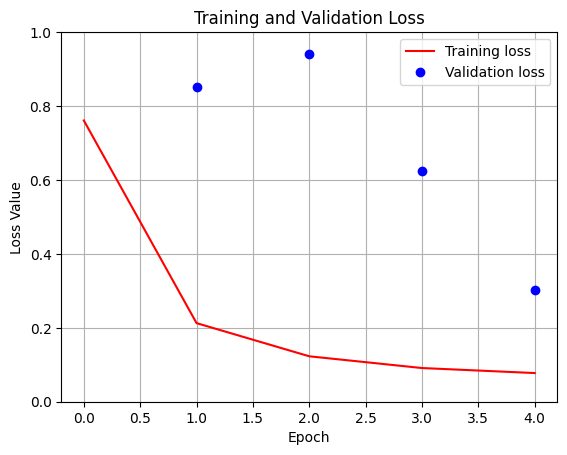

In [ ]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'bo', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.grid('on')
plt.legend()
plt.show()

## Make predictions

Давайте сделаем несколько предсказаний. Для экономии времени использовалось небольшое количество эпох, но вы можете его увеличить для того чтобы модель давала более точные результаты.

1
1/1 [==============================] - 0s 449ms/step


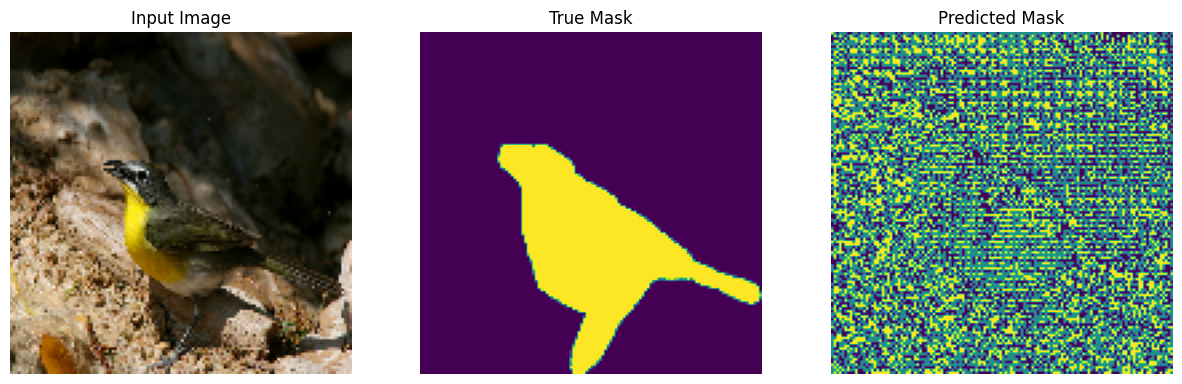

1
1/1 [==============================] - 1s 543ms/step


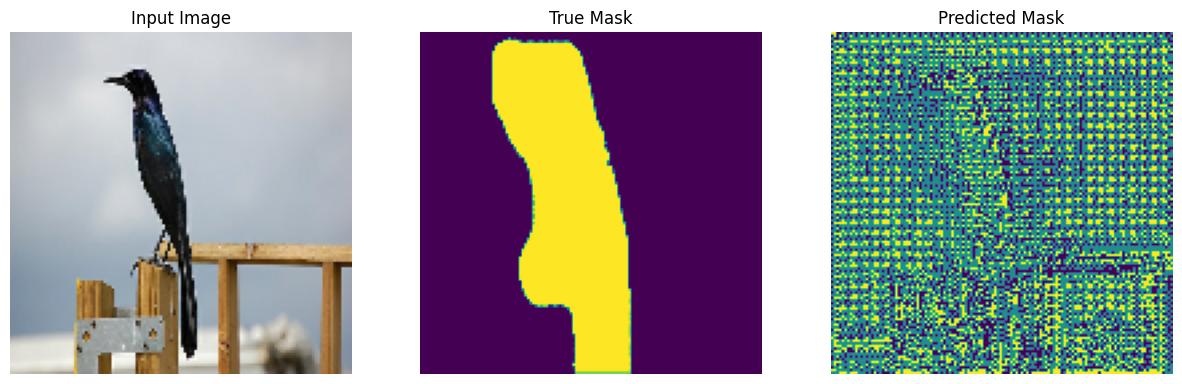

1
1/1 [==============================] - 0s 496ms/step


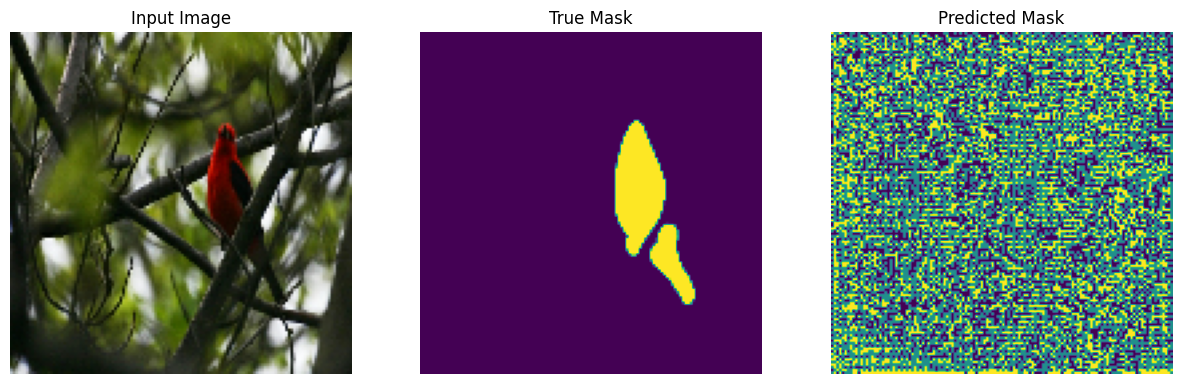

In [ ]:
show_predictions(test_dataset, 3)

## Практическое задание

1. Попробуйте обучить нейронную сеть U-Net на любом другом датасете.
2. Опишите  результат. Что помогло повысить точность?

3. *Попробуйте свои силы в задаче City Scapes на Kaggle - https://www.kaggle.com/dansbecker/cityscapes-image-pairs.
4. *Сделайте свою реализацию U-Net на TensorFlow

## Дополнительные материалы

<ol>
    <li>Оригинальная научная статья по FCN - https://arxiv.org/pdf/1411.4038.pdf</li>
    <li>Оригинальная научная статья по SegNet - https://arxiv.org/pdf/1511.00561.pdf</li>
    <li>Оригинальная научная статья по U-Net - https://arxiv.org/pdf/1505.04597.pdf</li>
     <li>Оригинальная научная статья по FPN - https://arxiv.org/pdf/1612.03144.pdf</li>
     <li>Оригинальная научная статья по Mask R-CNN - https://arxiv.org/pdf/2001.05566.pdf</li>
     <li> Научная статья с обзором отрасли сегментации изображений с помощью глубокого обучения - https://arxiv.org/pdf/2001.05566.pdf</li>
</ol>

## Используемая литература

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/tutorials/images/segmentation</li>
    <li>Image Segmentation Using Deep Learning: A Survey. Shervin Minaee и др. 15 Jan 2020</li>
    <li>Mask R-CNN, Kaiming He и др. 24 янв. 2018 г.</li>
    <li>https://blog.athelas.com/a-brief-history-of-cnns-in-image-segmentation-from-r-cnn-to-mask-r-cnn-34ea83205de4</li>
    <li>Википедия</li>  
</ol>